# Architecture experiment: Subjective and physiological responses to interiors


### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib
- seaborn
- keras

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [114]:
DATA_FOLDER = './data/' #The data is in the .gitignore in order to not upload it to the GitHub repository

Execute the following line to export from the jupyter notebook(.ipynb) to a .py file (ignore the warnings):

In [115]:
#!jupyter nbconvert --to script Project2-Notebook.ipynb 

For not show the warnings:

In [116]:
import warnings
warnings.filterwarnings(action = 'once')

## Exploratory Data Analysis

### Loading phase

First we load the data into a Pandas data frame (with the Pandas library; to install this package with conda run:
`conda install -c anaconda pandas`):

In [117]:
df_interior_features = pd.read_csv(DATA_FOLDER + 'T_features.csv')
df_labels_and_features = pd.read_csv(DATA_FOLDER + 'table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv')

Let's see what is inside `table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv`:

In [118]:
df_labels_and_features.head(7)

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,1,Greece,clear low,social,Male,P1EL,8,7,6,9,4,6,4,8,11.188207,0.907864,106.363985,0.104734
1,1,Greece,clear low,social,Male,P2EL,8,5,6,8,4,7,3,8,11.941067,0.904661,106.590842,0.122357
2,1,Greece,clear low,social,Male,P3EL,9,8,8,9,6,7,2,8,12.509719,0.905066,106.604335,0.119979
3,1,Greece,clear low,social,Male,P4EL,7,7,7,7,6,6,1,8,12.846015,0.906583,106.929875,0.115287
4,1,Greece,clear low,social,Male,P5EL,8,10,9,7,8,7,5,8,12.211881,0.907546,105.478575,0.118572
5,1,Greece,clear low,social,Male,P6EL,8,8,8,7,9,7,3,8,12.288385,0.912304,106.582042,0.113396
6,2,Greece,clear low,social,Male,P1EL,6,7,8,6,0,7,6,7,11.188207,0.907864,106.363985,0.104734


In [119]:
df_labels_and_features.shape

(1590, 18)

In [120]:
df_labels_and_features.columns

Index([u'ID', u'Country', u'Stimulus_SkyType', u'Stimulus_Context', u'Gender',
       u'Pattern', u'pleasant', u'interesting', u'exciting', u'calming',
       u'complex', u'bright', u'view', u'spacious', u'contrast_mean_mSC5',
       u'contrast_mean_Michelson', u'contrast_mean_RMS',
       u'complexity_mean_JPEGtoBMP'],
      dtype='object')

The data frame has 1590 rows × 18 columns where we can see the original sample of the experiment (both inputs and outputs (xn,yn)). Each column is explained below:
* 'ID': Identifier of the subject of the experiment (of one person).
* 'Country': Country where the person was living.  2 x countries (Greece –138 participants, Switzerland –127 participants)
* 'Stimulus_SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* 'Stimulus_Context':  2 x context scenarios (social scenario, work scenario)
* 'Gender': Male or Female
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* Outputs (yn): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'.
* interior metrics (for describing the interior (the kind of room, light, ...) quantitatively): 'contrast_mean_mSC5', 'contrast_mean_Michelson', 'contrast_mean_RMS', 'complexity_mean_JPEGtoBMP'.

Note: The metrics in this data set are applied to the whole virtual reallity image (in every interior).

Now let's see what is inside `T_features.csv`:

In [121]:
df_interior_features.head()

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797
1,p1_social_clearlow_sg_largewin_simu,P1EL,social,clearlow,5.571429,6,4.510204,5,5.897959,6.0,...,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709
2,p1_social_overcast_sg_largewin_simu,P1EL,social,overcast,6.093023,6,4.790698,5,6.651163,7.0,...,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091
3,p1_work_clearhigh_sg_largewin_simu,P1EL,work,clearhigh,5.804348,6,5.086957,5,6.152174,6.5,...,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465
4,p1_work_clearlow_sg_largewin_simu,P1EL,work,clearlow,5.255814,5,4.418605,5,5.837209,6.0,...,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615


In [122]:
df_interior_features.shape

(36, 31)

In [123]:
df_interior_features.columns

Index([u'filename', u'Pattern', u'Context', u'SkyType', u'mean_pleasant',
       u'median_pleasant', u'mean_interesting', u'median_interesting',
       u'mean_calming', u'median_calming', u'mean_exciting',
       u'median_exciting', u'mean_complex', u'median_complex', u'mean_bright',
       u'median_bright', u'mean_view', u'median_view', u'mean_spacious',
       u'median_spacious', u'contrast_mean_mSC5', u'contrast_max_mSC5',
       u'contrast_mean_Michelson', u'contrast_mean_Michelson_cube123',
       u'contrast_mean_Michelson_cube3', u'contrast_mean_RMS',
       u'contrast_mean_RMS_cube123', u'contrast_mean_RMS_cube3',
       u'complexity_mean_JPEGtoBMP', u'complexity_cube3_JPEGtoBMP',
       u'complexity_cube123_JPEGtoBMP'],
      dtype='object')

We have obtained a data frame with 36 rows × 31 columns. This time we see the features of each kind of interior (the kind of room, light, ...)  and several metrics for describing quantitatively the interior situation Each column is explained below:
* 'filename': File where we have the cube map projections associated to every interior. (See in `./Cubemap_Projections/BMP/<filename>` or `./Cubemap_Projections/JPEG/<filename>`). The filenames have the structure "p(pattern_id)_(context)_(SkyType)_sg_largewin_simu".
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* 'Context': 2 x context scenarios (social scenario, work scenario)
* 'SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* Means and medians of the outputs (of what people have answer in their respective survey): 'mean_pleasant', 'median_pleasant', 'mean_interesting', 'median_interesting', 'mean_calming', 'median_calming', mean_exciting', 'median_exciting', 'mean_complex', 'median_complex', 'mean_bright', 'median_bright', 'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
* Interior metrics (for describing the interior quantitatively): 'contrast_mean_mSC5', 'contrast_max_mSC5', 'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 'contrast_mean_RMS', 'contrast_mean_RMS_cube123','contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP', 'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP'

Note: The metrics in this data set are applied not just to the whole virtual reallity image (we have already this data in the other data frame), but to the different parts of the whole image. Cube1 refers to what you see on your left (when you are doing the experiment with VR), cube2 refers to the front and cube3 refers to the right. Cube123 refers to the metric applied to the three subimages. For more details see`./Cubemap_Projections/JPEG/<filename>`.

Having done this previous load and brief analysis, we are going to create the data frame we are interested in work with. Firstly we find that our inputs (or features) could be classified in two types and we are taking both of them: 
* 1- Features of the people (country and gender) who have taken part in the experiment.
* 2- Features of the interior: Now we are taking both categorical and metrics data.

Secondly, the labels (outputs) of our new data frame are the data that comes from every survey (which has been done by each person): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'. We are asked to study first the 'exciting' and the 'calming' labels but we will split the data frame afterwards.

In [124]:
df_labels_and_features.sample()

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
1306,80,Switzerland,clear low,social,Male,P5EL,8,7,7,7,8,9,9,8,12.211881,0.907546,105.478575,0.118572


In [125]:
#df_labels_and_features[df_labels_and_features['ID']==21] #What is the ID meaning?

In [126]:
df_interior_features.head(1)

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797


For doing the join, we check that one of the metrics determine totally the interior (there are not two interiors with the same metric value):

In [127]:
df_interior_features["to_join"]=(1000*df_interior_features["contrast_mean_RMS"]).astype(int) #We cannot do the join on the float
df_labels_and_features["to_join"]=(1000*df_labels_and_features["contrast_mean_RMS"]).astype(int) #so we add another column

df_interior_features.set_index("to_join").index.is_unique

True

In [128]:
df_labels_and_features.columns

Index([u'ID', u'Country', u'Stimulus_SkyType', u'Stimulus_Context', u'Gender',
       u'Pattern', u'pleasant', u'interesting', u'exciting', u'calming',
       u'complex', u'bright', u'view', u'spacious', u'contrast_mean_mSC5',
       u'contrast_mean_Michelson', u'contrast_mean_RMS',
       u'complexity_mean_JPEGtoBMP', u'to_join'],
      dtype='object')

In [129]:
df_ml_raw = df_interior_features.merge(df_labels_and_features, on = "to_join", how = 'inner', suffixes = ("_a",""))
df_ml_raw.head(1)

,filename,Pattern_a,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,5,7,0,7,6,9,5.023496,0.881714,104.887032,0.101518


In [130]:
df_ml_raw.columns

Index([u'filename', u'Pattern_a', u'Context', u'SkyType', u'mean_pleasant',
       u'median_pleasant', u'mean_interesting', u'median_interesting',
       u'mean_calming', u'median_calming', u'mean_exciting',
       u'median_exciting', u'mean_complex', u'median_complex', u'mean_bright',
       u'median_bright', u'mean_view', u'median_view', u'mean_spacious',
       u'median_spacious', u'contrast_mean_mSC5_a', u'contrast_max_mSC5',
       u'contrast_mean_Michelson_a', u'contrast_mean_Michelson_cube123',
       u'contrast_mean_Michelson_cube3', u'contrast_mean_RMS_a',
       u'contrast_mean_RMS_cube123', u'contrast_mean_RMS_cube3',
       u'complexity_mean_JPEGtoBMP_a', u'complexity_cube3_JPEGtoBMP',
       u'complexity_cube123_JPEGtoBMP', u'to_join', u'ID', u'Country',
       u'Stimulus_SkyType', u'Stimulus_Context', u'Gender', u'Pattern',
       u'pleasant', u'interesting', u'exciting', u'calming', u'complex',
       u'bright', u'view', u'spacious', u'contrast_mean_mSC5',
       u'contr

# New approach

Now we drop the duplicates columns and order the columns in order to have a data frame with the structure X|Y, where X is the matrix of features (each column is a feature) and Y is the matrix with the labels. 

In this new approach we are not using gender.

In [131]:
df_ml = df_ml_raw[['Country', 'Pattern', 'Context', 'SkyType', 'contrast_mean_mSC5', 'contrast_max_mSC5', 
               'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 
               'contrast_mean_RMS', 'contrast_mean_RMS_cube123', 'contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP',
               'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP', 'pleasant', 'interesting', 'exciting', 'calming', 
               'complex', 'bright', 'view', 'spacious']]

In [132]:
df_ml.head(1)

,Country,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,...,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP,pleasant,interesting,exciting,calming,complex,bright,view,spacious
0,Greece,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,...,0.158865,0.129797,7,5,5,7,0,7,6,9


We can also check and see that there are no missing values. (all instances are non-null)

In [133]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 23 columns):
Country                            1590 non-null object
Pattern                            1590 non-null object
Context                            1590 non-null object
SkyType                            1590 non-null object
contrast_mean_mSC5                 1590 non-null float64
contrast_max_mSC5                  1590 non-null int64
contrast_mean_Michelson            1590 non-null float64
contrast_mean_Michelson_cube123    1590 non-null float64
contrast_mean_Michelson_cube3      1590 non-null float64
contrast_mean_RMS                  1590 non-null float64
contrast_mean_RMS_cube123          1590 non-null float64
contrast_mean_RMS_cube3            1590 non-null float64
complexity_mean_JPEGtoBMP          1590 non-null float64
complexity_cube3_JPEGtoBMP         1590 non-null float64
complexity_cube123_JPEGtoBMP       1590 non-null float64
pleasant                           1590 non-

and see that all ratings are between 0 and 10:

In [134]:
df_ml[['pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright',
       'view', 'spacious']].describe().loc[['min','max']]


,pleasant,interesting,exciting,calming,complex,bright,view,spacious
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Finally, to work with the new approach we need to compute the percentage of ratings  of every scene that are over a certain value (6, 7 or 8 for example). First we take a new data frame with just the 36 different scenes (72 if we are considering the country):

In [135]:
#x_fdata = df_ml.iloc[:,1:15] # For not considering the country
#x_fdata = df_ml.iloc[:,0:15] # For considering the country

fdata = df_ml.iloc[:,0:15] #fdata -> first data without preprocessing
fdata.drop_duplicates(inplace = True)
fdata.set_index(['Country', 'Pattern', 'Context', 'SkyType'], inplace = True)
fdata

,,,,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
Country,Pattern,Context,SkyType,,,,,,,,,,,
Greece,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797
Switzerland,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797
Greece,P1EL,social,clearlow,11.188207,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709
Switzerland,P1EL,social,clearlow,11.188207,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709
Greece,P1EL,social,overcast,4.458815,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091
Switzerland,P1EL,social,overcast,4.458815,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091
Greece,P1EL,work,clearhigh,5.362578,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465
Switzerland,P1EL,work,clearhigh,5.362578,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465
Greece,P1EL,work,clearlow,11.038933,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615


Now we compute the percentages which we are working in this new approach:

In [136]:
computing_percentages_df = df_ml[['Country', 'Pattern', 'Context', 'SkyType']].copy()


limit = 7 ## Change this variable for working with the percentage of people how felt more than limit-excited
df_ml_over_limit = df_ml[df_ml["exciting"] >= limit]
computing_percentages_df2 = df_ml_over_limit[['Country', 'Pattern', 'Context', 'SkyType']].copy()

In [137]:
computing_percentages_df["Total_people"] = 0
computing_percentages_df = computing_percentages_df.groupby(['Country', 'Pattern', 'Context', 'SkyType']).count()

In [138]:
computing_percentages_df2["Excited_people"] = 0
computing_percentages_df2 = computing_percentages_df2.groupby(['Country', 'Pattern', 'Context', 'SkyType']).count()

In [139]:
computing_percentages_joined = pd.DataFrame.join(computing_percentages_df, computing_percentages_df2).fillna(value=0)

In [140]:
fdata = fdata.join(computing_percentages_joined)

In [141]:
fdata[["Total_people", "Excited_people"]].head(3)

,,,,Total_people,Excited_people
Country,Pattern,Context,SkyType,,
Greece,P1EL,social,clearhigh,21,1.0
Switzerland,P1EL,social,clearhigh,20,0.0
Greece,P1EL,social,clearlow,27,5.0


In [142]:
fdata["Percentage_excited_people"] = fdata["Excited_people"] / fdata["Total_people"]

In [143]:
fdata.head

<bound method DataFrame.head of                                        contrast_mean_mSC5  contrast_max_mSC5  \
Country     Pattern Context SkyType                                            
Greece      P1EL    social  clearhigh            5.023496                 82   
Switzerland P1EL    social  clearhigh            5.023496                 82   
Greece      P1EL    social  clearlow            11.188207                 85   
Switzerland P1EL    social  clearlow            11.188207                 85   
Greece      P1EL    social  overcast             4.458815                 49   
Switzerland P1EL    social  overcast             4.458815                 49   
Greece      P1EL    work    clearhigh            5.362578                116   
Switzerland P1EL    work    clearhigh            5.362578                116   
Greece      P1EL    work    clearlow            11.038933                116   
Switzerland P1EL    work    clearlow            11.038933                116   
Greece  

In [144]:
fdata = fdata.drop(columns = ["Total_people", "Excited_people"])
fdata.reset_index(inplace = True)
fdata.head(3)

,Country,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP,Percentage_excited_people
0,Greece,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797,0.047619
1,Switzerland,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797,0.000000
2,Greece,P1EL,social,clearlow,11.188207,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709,0.185185


In [145]:
x_fdata = fdata.iloc[:, 0:15]
y_data = fdata["Percentage_excited_people"] #Note that y_data is a pandas Series

### Preprocesing Phase

From the dataframe we can see that there are 5 catgorical features:
1. __*Country*__  
2. __*Pattern*__ 
3. __*Context*__ 
4. __*SkyType*__ 

We can confirm this by checking the type of data for each feature:

In [146]:
x_fdata.dtypes

Country                             object
Pattern                             object
Context                             object
SkyType                             object
contrast_mean_mSC5                 float64
contrast_max_mSC5                    int64
contrast_mean_Michelson            float64
contrast_mean_Michelson_cube123    float64
contrast_mean_Michelson_cube3      float64
contrast_mean_RMS                  float64
contrast_mean_RMS_cube123          float64
contrast_mean_RMS_cube3            float64
complexity_mean_JPEGtoBMP          float64
complexity_cube3_JPEGtoBMP         float64
complexity_cube123_JPEGtoBMP       float64
dtype: object

As we can see the five features mentionned above are the only categorical features (type object).

Let's inspect these features closely:

In [147]:
categorical_features = ['Country','Pattern','Context', \
                        'SkyType']
for feat in categorical_features:
    print(feat + ':')
    print(x_fdata[feat].value_counts())

Country:
Greece         36
Switzerland    36
Name: Country, dtype: int64
Pattern:
P5EL    12
P6EL    12
P3EL    12
P4EL    12
P1EL    12
P2EL    12
Name: Pattern, dtype: int64
Context:
social    36
work      36
Name: Context, dtype: int64
SkyType:
clearhigh    24
clearlow     24
overcast     24
Name: SkyType, dtype: int64


In order to perform dummy variable encoding on the categorical features, we can use the pandas method `pd.get_dummies()`. Also since we need k-1 dummy variables to represent k categories, we can drop the first column for each encoding (`drop_first = True`). We'll store this as a new dataframe `dummy_df`.

In [148]:
dummy_df = pd.get_dummies(x_fdata, columns=categorical_features, drop_first=True)
dummy_df

,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP,Country_Switzerland,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_work,SkyType_clearlow,SkyType_overcast
0,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797,0,0,0,0,0,0,0,0,0
1,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797,1,0,0,0,0,0,0,0,0
2,11.188207,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709,0,0,0,0,0,0,0,1,0
3,11.188207,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709,1,0,0,0,0,0,0,1,0
4,4.458815,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091,0,0,0,0,0,0,0,0,1
5,4.458815,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091,1,0,0,0,0,0,0,0,1
6,5.362578,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465,0,0,0,0,0,0,1,0,0
7,5.362578,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465,1,0,0,0,0,0,1,0,0
8,11.038933,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615,0,0,0,0,0,0,1,1,0
9,11.038933,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615,1,0,0,0,0,0,1,1,0


We standardize the features in preparation for the training (output excluded, "exciting" column).

In [149]:
x_without_std = dummy_df.copy() #x_without_std is the final data without standardize (Just in case you want to use it)

for feat in dummy_df.columns.tolist():
    mean = dummy_df[feat].mean()
    std = dummy_df[feat].std()
    dummy_df[feat] = (dummy_df[feat] - mean)/std

In [150]:
x_data = dummy_df #x_data will be the final standardized data

#### Splitting the data

In order to split the data into the two sets (training and test), first we need to rejoin the y_data and the x_data. Then we can use the sample method (`pd.sample()`) which  randomly samples from the dataframe according to a given ratio (0.8 for train in this case). The remaining part of the data will be the test set.

In [151]:
#In order to split the data, we join then again:
data = pd.concat([y_data, x_data], axis=1, sort=False)
data.head(1)

,Percentage_excited_people,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,complexity_cube123_JPEGtoBMP,Country_Switzerland,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_work,SkyType_clearlow,SkyType_overcast
0,0.047619,-0.950306,-0.992096,-1.462638,-1.458138,-1.179713,-0.454993,0.636979,0.703101,-0.1363,...,0.462413,-0.993031,-0.444097,-0.444097,-0.444097,-0.444097,-0.444097,-0.993031,-0.702179,-0.702179


In [152]:
train_df = data.sample(frac=0.8,replace=False)
test_df = data.drop(train_df.index.tolist(),axis=0)

In [153]:
train_df.head(3)

,Percentage_excited_people,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,complexity_cube123_JPEGtoBMP,Country_Switzerland,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_work,SkyType_clearlow,SkyType_overcast
70,0.318182,-0.429425,0.881863,0.863138,1.103646,0.495891,-0.461941,0.379658,0.618688,-0.951637,...,-1.153459,-0.993031,-0.444097,-0.444097,-0.444097,-0.444097,2.220485,0.993031,-0.702179,1.404358
14,0.185185,1.322121,-1.102329,-0.377114,-0.800286,0.370736,0.511701,-1.524414,-1.540887,2.114744,...,1.223241,-0.993031,2.220485,-0.444097,-0.444097,-0.444097,-0.444097,-0.993031,1.404358,-0.702179
20,0.173913,1.190925,0.661397,1.140571,0.929926,-0.082194,1.499006,-0.303289,-0.684012,1.600920,...,0.825970,-0.993031,2.220485,-0.444097,-0.444097,-0.444097,-0.444097,0.993031,1.404358,-0.702179


In [154]:
test_df.head(3)

,Percentage_excited_people,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,complexity_cube123_JPEGtoBMP,Country_Switzerland,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_work,SkyType_clearlow,SkyType_overcast
0,0.047619,-0.950306,-0.992096,-1.462638,-1.458138,-1.179713,-0.454993,0.636979,0.703101,-0.136300,...,0.462413,-0.993031,-0.444097,-0.444097,-0.444097,-0.444097,-0.444097,-0.993031,-0.702179,-0.702179
1,0.000000,-0.950306,-0.992096,-1.462638,-1.458138,-1.179713,-0.454993,0.636979,0.703101,-0.136300,...,0.462413,0.993031,-0.444097,-0.444097,-0.444097,-0.444097,-0.444097,-0.993031,-0.702179,-0.702179
3,0.090909,1.074806,-0.826747,-0.225601,-0.552827,1.194953,0.382989,-1.812379,-1.773659,0.211079,...,0.264391,0.993031,-0.444097,-0.444097,-0.444097,-0.444097,-0.444097,-0.993031,1.404358,-0.702179


Quick check of the validity of the split by making sure that the size of the train plus the size of the test equals the size of the dummy:

In [155]:
print(train_df.shape[0] + test_df.shape[0] == dummy_df.shape[0])

True


Hence our standardized features and our labels are ready to go.

In [189]:
x_train = train_df.iloc[:,1:-1]
y_train = train_df.iloc[:,0:1]
x_test = test_df.iloc[:,1:-1]
y_test = test_df.iloc[:, 0:1]
#x_data and y_data are the preprocessed data without splitting. Maybe we can use them considering that we have very few data

In [190]:
print(y_train.head)

<bound method DataFrame.head of     Percentage_excited_people
70                   0.318182
14                   0.185185
20                   0.173913
57                   0.400000
23                   0.190476
43                   0.260870
47                   0.190476
10                   0.136364
61                   0.350000
7                    0.130435
29                   0.285714
12                   0.047619
71                   0.333333
49                   0.350000
9                    0.000000
15                   0.227273
30                   0.391304
66                   0.260870
21                   0.000000
68                   0.521739
60                   0.476190
8                    0.260870
33                   0.300000
51                   0.454545
58                   0.318182
24                   0.380952
31                   0.173913
39                   0.545455
13                   0.050000
42                   0.347826
64                   0.454545
45      

In [191]:
print(x_train.head)

<bound method DataFrame.head of     contrast_mean_mSC5  contrast_max_mSC5  contrast_mean_Michelson  \
70           -0.429425           0.881863                 0.863138   
14            1.322121          -1.102329                -0.377114   
20            1.190925           0.661397                 1.140571   
57            1.402022           0.385815                 1.343614   
23           -1.003274          -0.165349                 0.649211   
43           -0.272251           0.771630                 0.714451   
47           -0.522262          -0.055116                 0.775101   
10           -0.985375          -0.110233                 0.634895   
61           -0.258284           0.661397                -1.227167   
7            -0.838917           0.881863                 0.546094   
29           -0.948651          -2.149542                -1.113393   
12           -1.032270          -1.047213                -1.462549   
71           -0.429425           0.881863                 

## Exploring different approachs

Having done that, we can start trying differents methods for obtaining predictions about the excitation/calm of a person who do the experiment.

In [157]:
#!jupyter nbconvert --to script Project2-Notebook - New Approach.ipynb 

/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdout
    Write notebook output to stdout instead of files.
--stdi

In [214]:
#y_train = y_train.transpose()
print(x_train.shape[0], x_train.shape[1])
print(y_train.shape[0], y_train.shape[1])

print(x_test.shape[0], x_test.shape[1])
print(y_test.shape[0], y_test.shape[1])

(58, 19)
(58, 1)
(14, 19)
(14, 1)


## RIDGE REGRESSION 

In [204]:
# First try

In [251]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)

y_pred=clf.predict(x_train)

In [218]:
#print(y_pred)

In [219]:
#print(y_train) ## I think the results of the model over the trained data seems to be not very bad

In [ ]:
import matplotlib.pyplot as plt

In [298]:
# Hard Try

In [321]:
lambdas = np.concatenate((np.array([0]), np.logspace(-9, 10, 22)), axis=0)
degrees = np.array([1, 2, 3, 4, 5])
ypred_train=np.zeros((len(y_train), len(lambdas), len(degrees)))
ypred_test=np.zeros((len(y_test), len(lambdas), len(degrees)))

xtrain=x_train.values
ytrain=y_train.values

xtest=x_test.values
ytest=y_test.values

h=0
w=0
while(w<len(degrees)):
    pol = PolynomialFeatures(degrees[w], True, True)
    phx_train = pol.fit_transform(xtrain, ytrain)
    phx_test = pol.fit_transform(xtest, ytest)
    h=0
    while(h<len(lambdas)):
        clf = Ridge(lambdas[h], solver="lsqr")
        clf.fit(phx_train, y_train)
        ypred_train[:,h,w]=clf.predict(phx_train).transpose()
        ypred_test[:,h,w]=clf.predict(phx_test).transpose()
        h=h+1
    w=w+1

#We can play with the function: PolynomialFeatures

In [322]:
#plt.title("MSE Y pred train vs Lambdas")
#plt.xlabel("Lambdas")
#plt.semilogx(lambdas, mse_pred_test[0])


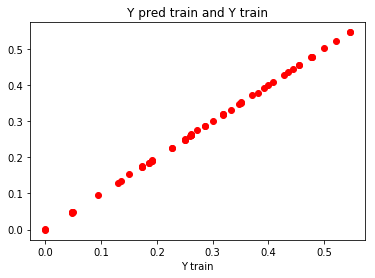

In [324]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_train, ypred_train[:,0,4], 'ro')
#We can see that the shape of the graphic tends to be a linear (everything matches). Seems to OVERFITTING
#Here we are taking degree 5 and small lambda

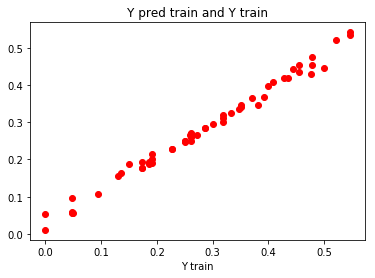

In [332]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_train, ypred_train[:,14,4], 'ro') # Lambda starts to affect, higher values of lambda 

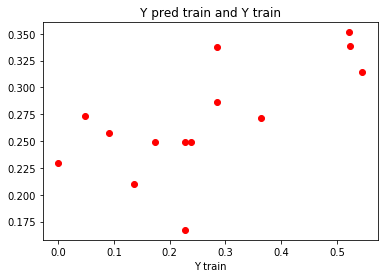

In [316]:
#For the test
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_test, ypred_test[:,16, 4], 'ro') 
# As we see we are overfitting, lets plot with less degree

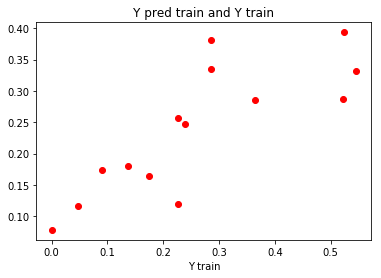

In [317]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_test, ypred_test[:,16, 0], 'ro') #Seems to try to be linear

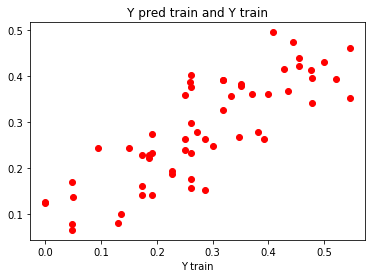

In [336]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_train, ypred_train[:,10, 0], 'ro') #Seems to try to be linear

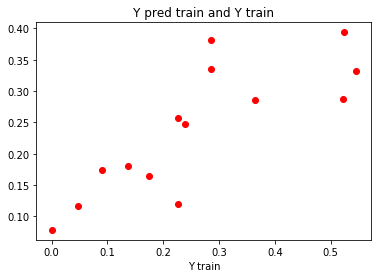

In [318]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_test, ypred_test[:,0, 0], 'ro') #Seems to try to be linear

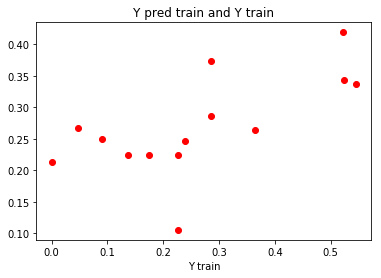

In [319]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_test, ypred_test[:,10, 3], 'ro')

In [247]:
print(ypred_train[:,10])

[0.3713948  0.22997328 0.13834357 0.38343541 0.15259591 0.23192716
 0.22107094 0.09163659 0.37602723 0.11481448 0.30699922 0.16609383
 0.33361647 0.3616577  0.1159417  0.19219494 0.24357398 0.39970295
 0.10056524 0.37531868 0.41380557 0.15372003 0.23040702 0.44712104
 0.37493069 0.28783165 0.20579565 0.36600831 0.1283155  0.2697055
 0.45008749 0.28245535 0.36192461 0.48489937 0.50717131 0.18805957
 0.33754035 0.20679554 0.32023368 0.24891103 0.42121374 0.24896577
 0.46939298 0.20065908 0.05385825 0.32012625 0.15028123 0.21113269
 0.28674411 0.36857    0.35790458 0.25005332 0.39943603 0.40378665
 0.42204373 0.07746161 0.40634833 0.1690172 ]


In [248]:
ypred_train[:,0]

array([0.37138875, 0.2299773 , 0.13833801, 0.38343894, 0.15259876,
       0.23192623, 0.22107117, 0.09163721, 0.37602778, 0.1148175 ,
       0.30700517, 0.1660924 , 0.33361009, 0.36165423, 0.11594328,
       0.19219864, 0.24356978, 0.39970883, 0.10055935, 0.37531694,
       0.41380644, 0.15372194, 0.2304011 , 0.44712124, 0.37493085,
       0.28783658, 0.20579112, 0.3660091 , 0.12831374, 0.26970489,
       0.45009207, 0.28245976, 0.36193017, 0.4848999 , 0.50717096,
       0.18805789, 0.33753828, 0.20679957, 0.32023842, 0.24890636,
       0.42121761, 0.24896518, 0.4693923 , 0.20065135, 0.05385855,
       0.32012612, 0.15027923, 0.2111277 , 0.28674384, 0.36856846,
       0.35790478, 0.25005792, 0.3994329 , 0.40378776, 0.42204494,
       0.07746144, 0.40634712, 0.16902091])

In [249]:
ypred_train[:,16]

array([0.37250258, 0.22924415, 0.13935525, 0.38278381, 0.15207897,
       0.23209471, 0.22103824, 0.09152949, 0.37593309, 0.11425167,
       0.3058927 , 0.16635838, 0.33478463, 0.36229456, 0.11566079,
       0.1915262 , 0.24434627, 0.3986243 , 0.1016373 , 0.3756469 ,
       0.41365103, 0.15337874, 0.2314804 , 0.44708265, 0.37491386,
       0.28693483, 0.20662833, 0.3658608 , 0.12864044, 0.26981266,
       0.44923577, 0.28164871, 0.36090636, 0.48480059, 0.50722854,
       0.18836449, 0.33792896, 0.20605016, 0.31936666, 0.24976543,
       0.42050175, 0.24907161, 0.4695106 , 0.20206304, 0.05381154,
       0.3201548 , 0.15064654, 0.21204749, 0.28678956, 0.36884463,
       0.35787274, 0.24921688, 0.4000125 , 0.40357875, 0.42182948,
       0.07748878, 0.40656257, 0.16833221])

In [ ]:
plt.title("Y pred train and Y train")
plt.xlabel("Y train")
plt.plot(y_train, ypred_train[:,0], 'ro')